## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/home/tom/data/data_000637.txt', nrows=11000)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
10995,1,0,139,3869200277,204,0
10996,1,0,61,3869200277,202,20
10997,1,0,63,3869200277,204,1
10998,1,0,59,3869200277,283,29


2\. Find out the number of BX in a ORBIT (the value 'x').

In [4]:
df['ORBIT_CNT'].value_counts().sort_index()

3869200167     43
3869200168     85
3869200169    127
3869200170     98
3869200171    109
             ... 
3869200273    106
3869200274     84
3869200275     82
3869200276    113
3869200277      8
Name: ORBIT_CNT, Length: 111, dtype: int64

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [5]:
#df['TIME']=

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [6]:
df['HEAD']=np.random.randint(0,2, size=len(df))
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,0,0,123,3869200167,2374,26
1,0,0,124,3869200167,2374,27
2,0,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
10995,0,0,139,3869200277,204,0
10996,0,0,61,3869200277,202,20
10997,1,0,63,3869200277,204,1
10998,1,0,59,3869200277,283,29


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [7]:
df2=df[df['HEAD']==1]
df2

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
7,1,0,139,3869200167,2776,0
9,1,0,60,3869200167,2788,7
...,...,...,...,...,...,...
10992,1,0,63,3869200277,193,12
10993,1,0,62,3869200277,198,28
10997,1,0,63,3869200277,204,1
10998,1,0,59,3869200277,283,29


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

<AxesSubplot:xlabel='Channel', ylabel='Counts'>

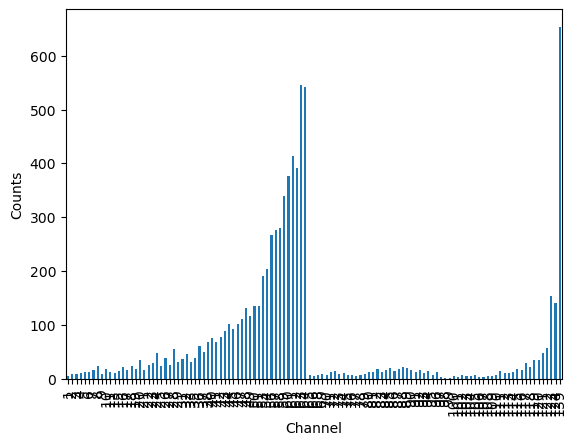

In [8]:
df[df['FPGA']==0]['TDC_CHANNEL'].value_counts().sort_index().plot(xlabel='Channel', ylabel='Counts', kind='bar')

<AxesSubplot:xlabel='Channel', ylabel='Count'>

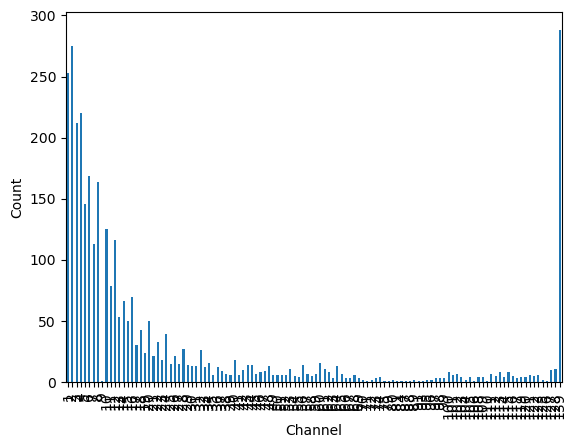

In [9]:
df[df['FPGA']==1]['TDC_CHANNEL'].value_counts().sort_index().plot(xlabel='Channel', ylabel='Count', kind='bar')

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [10]:
df.groupby(['TDC_CHANNEL']).size().sort_values()[:3]

TDC_CHANNEL
126    1
125    2
67     3
dtype: int64

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [11]:
print('# of unique orb',len(df['ORBIT_CNT'].value_counts()))
print('# od unique orb w/ >1 TDC_CHANNEL=139', len(df[df['TDC_CHANNEL']==139]['ORBIT_CNT'].value_counts()))

# of unique orb 111
# od unique orb w/ >1 TDC_CHANNEL=139 111


In [12]:
# the number of counts of TDC_CHANNELS=139 for each orbit
df[df['TDC_CHANNEL']==139]['ORBIT_CNT'].value_counts()

3869200218    15
3869200185    15
3869200183    14
3869200261    14
3869200174    14
              ..
3869200176     4
3869200236     3
3869200223     3
3869200189     3
3869200277     1
Name: ORBIT_CNT, Length: 111, dtype: int64

In [13]:
# checking if it is right
df[(df['TDC_CHANNEL']==139) & (df['ORBIT_CNT']==3869200189) ]

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
2187,1,0,139,3869200189,2377,0
2199,1,0,139,3869200189,2872,0
2209,1,0,139,3869200189,3341,0
